In [1]:
import pandas as pd
import numpy as np
import chunk
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [79]:
pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows',100)

# Keeping Pack, Vendor Number, Bottle Volume (ml), Bottles Sold, Volume Sold (Liters) for future math, not for modeling

In [3]:
f12=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//csv files//cleaned//final_2012.csv')
f13=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//csv files//cleaned//final_2013.csv')
f14=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//csv files//cleaned//final_2014.csv')
f15=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//csv files//cleaned//final_2015.csv')
f16=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//csv files//cleaned//final_2016.csv')
f17=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//csv files//cleaned//final_2017.csv')
f12=f12.drop('Unnamed: 0',axis=1)
f13=f13.drop('Unnamed: 0',axis=1)
f14=f14.drop('Unnamed: 0',axis=1)
f15=f15.drop('Unnamed: 0',axis=1)
f16=f16.drop('Unnamed: 0',axis=1)
f17=f17.drop('Unnamed: 0',axis=1)

In [347]:
f12=pd.read_csv('C://Users//Matthew//DA//Activities//Final_Project//Final Cuts//final_2012.csv')
f12=f12.drop('Unnamed: 0',axis=1)

In [4]:
# convert data to appropriate dtypes
def change_dtypes(x):
    x['Date']=pd.to_datetime(x['Date'])
    x['Vendor Number']=x['Vendor Number'].astype(str)
    x['Store Number']=x['Store Number'].astype(str)
    x['Item Number']=x['Item Number'].astype(str)
    return x

# drop following stores due to extremely low sales (4115) and extremely high cost per bottle (4669)
def drop_bad_stores(x):
    x[x['Store Number']!='4115']['Store Number']
    x[x['Store Number']!='4669']['Store Number']
    
    return x
#drop outlier of item Remy Martin Louis Xiii Cognac (skews cost)
def drop_item_outlier(x):
    x[x['Item Number']!='903056']['Item Number']
    return x

def costtot(x,y):
    return x*y


In [ ]:
f12=change_dtypes(f12)
f12=drop_bad_stores(f12)
f12=drop_item_outlier(f12)

f12=change_dtypes(f12)
f13=change_dtypes(f13)
f14=change_dtypes(f14)
f15=change_dtypes(f15)
f16=change_dtypes(f16)
f17=change_dtypes(f17)

f12=drop_bad_stores(f12)
f13=drop_bad_stores(f13)
f14=drop_bad_stores(f14)
f15=drop_bad_stores(f15)
f16=drop_bad_stores(f16)
f17=drop_bad_stores(f17)

In [547]:
f12=drop_item_outlier(f12)
f13=drop_item_outlier(f13)
f14=drop_item_outlier(f14)
f15=drop_item_outlier(f15)
f16=drop_item_outlier(f16)
f17=drop_item_outlier(f17)

In [553]:
f17.isna().sum()

Date                     0
Store Number             0
Category Name           28
Vendor Number            0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
dtype: int64

# Model Preparation
## Now that all data is clean, I focus on prepping to model.
## In order to get a sense of if my work will yield results, I work with only the 2012 dataset from here on out before expanding to the other datasets. Below I observe the data for outliers and separate into discrete and continuous sets to apply to the model in the next Jupyter file

In [554]:
# Model of year 2012
m12=f12[['Store Number', 'Item Number', 'Volume Sold (Liters)','State Bottle Cost']]

In [324]:
m12['Cost Total']=list(map(costtot,f12['Bottles Sold'],f12['State Bottle Cost']))

<ipython-input-324-1d5ad007a48a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m12['Cost Total']=list(map(costtot,f12['Bottles Sold'],f12['State Bottle Cost']))


In [ ]:
m12.columns

In [321]:
m12.dtypes

Date                    datetime64[ns]
Store Number                    object
Category Name                   object
Vendor Number                   object
Item Number                     object
Item Description                object
Pack                             int64
Bottle Volume (ml)               int64
State Bottle Cost              float64
State Bottle Retail            float64
Bottles Sold                     int64
Sale (Dollars)                 float64
Volume Sold (Liters)           float64
dtype: object

In [52]:
f12.columns

Index(['Date', 'Store Number', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)'],
      dtype='object')

In [170]:
f12.head(3)

,Date,Store Number,Category Name,Vendor Number,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Cost Total
0,2012-03-06,2532,MISC. IMPORTED CORDIALS & LIQUEURS,192.0,65256,Jagermeister Liqueur,12,750,11.58,17.37,12,208.44,9.0,138.96
1,2012-04-09,2633,SCOTCH WHISKIES,260.0,5289,J & B Rare Scotch,12,1000,14.98,22.47,12,269.64,12.0,179.76
2,2012-01-17,2959,PUERTO RICO & VIRGIN ISLANDS RUM,35.0,43038,Bacardi Gold Rum,6,1750,14.67,22.00,6,132.00,10.5,88.02


In [57]:
f12.dtypes

Date                     object
Store Number              int64
Category Name            object
Vendor Number           float64
Item Number               int64
Item Description         object
Pack                      int64
Bottle Volume (ml)        int64
State Bottle Cost       float64
State Bottle Retail     float64
Bottles Sold              int64
Sale (Dollars)          float64
Volume Sold (Liters)    float64
dtype: object

### columns for input:  'Store Number', 'Vendor Number', 'Item Number', 'Bottle Volume (ml)', 'Bottles Sold'      
### Target =State Bottle Cost

In [322]:
# Model of year 2012
m12=f12[['Store Number', 'Item Number', 'Volume Sold (Liters)','State Bottle Cost']]

In [323]:
def costtot(x,y):
    return x*y

In [324]:
m12['Cost Total']=list(map(costtot,f12['Bottles Sold'],f12['State Bottle Cost']))

<ipython-input-324-1d5ad007a48a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m12['Cost Total']=list(map(costtot,f12['Bottles Sold'],f12['State Bottle Cost']))


In [325]:
m12.columns

Index(['Store Number', 'Item Number', 'Volume Sold (Liters)',
       'State Bottle Cost', 'Cost Total'],
      dtype='object')

In [395]:
f12.head(2)

,Date,Store Number,Category Name,Vendor Number,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2012-03-06,2532,MISC. IMPORTED CORDIALS & LIQUEURS,192.0,65256,Jagermeister Liqueur,12,750,11.58,17.37,12,208.44,9.0
1,2012-04-09,2633,SCOTCH WHISKIES,260.0,5289,J & B Rare Scotch,12,1000,14.98,22.47,12,269.64,12.0


In [295]:
#remove Vendor Number, Bottles Sold
#replace Bottle volume (ml) with Bottle volume (L)
m12sv=m12.sort_values('State_Bottle_Cost')
m12sv.tail(5)

,Store_Number,Item_Number,Volume_Sold_(Liters),State_Bottle_Cost,Cost_Total,Stores
31385,2190,904509,0.75,425.00,425.00,low
125378,2190,965094,3.75,438.79,2193.95,low
17465,2633,903056,0.75,1111.94,1111.94,low
21193,2633,903056,0.75,1200.00,1200.00,low
117816,2190,903056,1.50,1200.00,2400.00,low


In [416]:
m12sv.head(100)

,Store_Number,Item_Number,Volume_Sold_(Liters),State_Bottle_Cost,Cost_Total,Stores
60536,4141,54446,9.00,0.0,0.0,medhigh
174674,2627,62096,3.00,0.0,0.0,low
125056,3778,55084,1.88,0.0,0.0,medhigh
152102,2190,54447,3.00,0.0,0.0,low
168991,2626,44657,12.00,0.0,0.0,low
157971,2190,85606,9.00,0.0,0.0,low
72218,2633,85606,9.00,0.0,0.0,low
124681,2953,84486,3.00,0.0,0.0,midlow
134644,4273,55086,2.25,0.0,0.0,medhigh
61085,3785,44657,12.00,0.0,0.0,medhigh


In [402]:
m12sv['Stores'].isna().sum()

0

In [400]:
print(len(m12sv['Stores']),len(m12['Store Number']))

184090 184093


In [314]:
m12['Store_Number'].value_counts()

2190    29529
2633    17590
2561     8268
2528     6553
2954     5912
4273     5832
2627     5806
2626     5400
2959     5363
2636     5180
4012     4473
2527     4200
2532     4071
2248     3775
4108     3514
4295     3347
4109     3145
3400     3133
2958     2845
4057     2820
2953     2677
4617     2337
3785     2280
4062     2241
4139     2100
2955     2081
4349     1967
3825     1942
3778     1907
3772     1898
4332     1845
4829     1679
2956     1578
4478     1563
4140     1522
4632     1503
3696     1498
3678     1453
4302     1361
4304     1155
4169     1150
4567     1128
4186     1040
3440     1033
4301     1001
4597      997
4377      834
4511      732
4669      731
4141      715
3877      708
4343      644
4622      567
4596      534
4595      499
4641      485
4599      456
4594      451
4600      436
4601      436
4361      390
4603      314
4598      300
4680      197
4802      124
4796      104
4795      102
4803       98
4798       98
4797       95
4804       95
4800  

In [396]:
counts, edges, bars = plt.hist(itemnumdf['CPB'], bins=[0, 50, 90, 130, 450])
print(counts)
print(counts[0]) # first bin

NameError: name 'itemnumdf' is not defined

In [397]:
counts

array([2.402e+03, 5.800e+01, 1.300e+01, 3.000e+00, 2.000e+00, 2.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00])

In [348]:
f12.describe()

,Store Number,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
count,184093.000000,184093.000000,184093.000000,184093.000000,184093.000000,184093.000000,184093.000000,184093.000000,184093.000000,184093.000000
mean,3191.407625,259.746824,51836.922811,13.042555,854.228488,9.241965,13.898564,13.437073,167.560697,11.026828
std,852.491759,146.811006,84895.728931,8.271095,442.529185,8.493111,12.743367,60.476884,1039.338782,61.085508
min,2190.000000,35.000000,413.000000,1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2532.000000,115.000000,31719.000000,12.000000,750.000000,4.860000,7.320000,3.000000,37.960000,2.250000
50%,2953.000000,260.000000,40621.000000,12.000000,750.000000,7.500000,11.250000,6.000000,78.360000,9.000000
75%,4108.000000,380.000000,58868.000000,12.000000,1000.000000,11.300000,17.110000,12.000000,152.880000,10.500000
max,4829.000000,987.000000,988536.000000,48.000000,3000.000000,1200.000000,1800.000000,15000.000000,254100.000000,15000.000000


In [428]:
m12

,Store Number,Item Number,Volume Sold (Liters),State Bottle Cost,Cost Total,Stores2,Stores3
0,2532,65256,9.00,11.58,138.96,high,low
1,2633,5289,12.00,14.98,179.76,high,low
2,2959,43038,10.50,14.67,88.02,med,midlow
3,2955,28866,9.00,12.00,144.00,med,midlow
4,4669,901167,2.25,19.87,59.61,med,high
...,...,...,...,...,...,...,...
184088,2959,22788,21.00,7.24,86.88,NaN,midlow
184089,2633,34820,18.00,7.97,191.28,NaN,low
184090,3825,89199,9.00,5.49,131.76,NaN,medhigh
184091,2561,89786,4.50,7.65,45.90,NaN,low


In [398]:
m12.head()
m12.dtypes

Store Number             object
Item Number              object
Volume Sold (Liters)    float64
State Bottle Cost       float64
Cost Total              float64
dtype: object

In [344]:
m12.describe()

,Volume Sold (Liters),State Bottle Cost,Cost Total
count,184093.000000,184093.000000,184093.000000
mean,11.026828,9.241965,111.495834
std,61.085508,8.493111,693.004327
min,0.100000,0.000000,0.000000
25%,2.250000,4.860000,25.200000
50%,9.000000,7.500000,51.960000
75%,10.500000,11.300000,102.000000
max,15000.000000,1200.000000,169500.000000


In [ ]:
iqr=itemnumdf.describe().T['75%'].T['CPB']-itemnumdf.describe().T['25%'].T['CPB']

In [309]:
m12tester=f12.groupby(['Item Number']).agg({'State Bottle Cost':['mean']})
m12tester=m12tester.reset_index()
m12tester.columns = ['Item_Number','CPB']
m12tester.sort_values('CPB')
m12tester=m12tester[m12tester['Item_Number']!=903056]

In [415]:
m12tester

,Item_Number,CPB
0,413,9.5725
1,428,13.1200
2,433,9.9700
3,447,19.7150
4,525,15.7400
...,...,...
2479,979966,4.3100
2480,981177,3.0000
2481,986726,13.2500
2482,987266,20.7700


In [364]:
m12tester['CPB'].max()

438.79

(array([  1.,   3.,   9.,  26.,  17.,  17.,  63.,  62., 120.,  85.,  87.,
         72., 132.,  79., 114., 120.,  82.,  74.,  65.,  57.,  73.,  95.,
         55.,  47.,  50.,  50.,  44.,  39.,  35.,  46.,  26.,  28.,  24.,
         22.,  21.,  31.,  20.,  22.,  16.,  17.,  20.,  17.,  18.,  20.,
         13.,  12.,  14.,   6.,  12.,  17.,  16.,  11.,  12.,  10.,  14.,
          6.,   8.,   4.,   8.,  13.,   5.,   6.,   9.,   3.,   2.,   6.,
          4.,   2.,   7.,   8.,   8.,   3.,   7.,   3.,   1.,   5.,   3.,
          0.,   5.,   3.,   3.,   0.,   3.,   1.,   1.,   3.,   1.,   3.,
          0.,   0.,   0.,   1.,   2.,   2.,   2.,   1.,   0.,   2.,   0.,
          2.,   2.,   2.,   0.,   2.,   4.,   2.,   1.,   3.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,   2.,   1.,
          0.,   2.,   1.,   0.,   2.,   1.,   0.,   1.,   0.,   3.,   2.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0., 

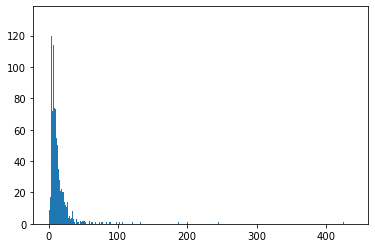

In [361]:
plt.hist(m12tester.CPB,bins=878)

In [429]:
m12tester['CPB Labels'] = pd.DataFrame(pd.cut(m12tester['CPB'],bins=[0,1.5,3.,11.,15.,27.5,439], labels=['rare','occasional','constant','often','occasional','rare'],ordered=False))
salefreq

,CPB
0,constant
1,often
2,constant
3,occasional
4,occasional
...,...
2479,constant
2480,occasional
2481,often
2482,occasional


In [435]:
m12tester['Item Number']=m12tester['Item_Number'].astype(str)

In [439]:
m12tester=m12tester.drop('Item_Number',axis=1)

In [440]:
m12tester.dtypes

CPB            float64
CPB Labels      object
Item Number     object
dtype: object

In [430]:
m12tester

,Item_Number,CPB,CPB Labels
0,413,9.5725,constant
1,428,13.1200,often
2,433,9.9700,constant
3,447,19.7150,occasional
4,525,15.7400,occasional
...,...,...,...
2479,979966,4.3100,constant
2480,981177,3.0000,occasional
2481,986726,13.2500,often
2482,987266,20.7700,occasional


In [442]:
m12merge=m12.merge(m12tester, how='inner',left_on='Item Number',right_on='Item Number')

In [444]:
m12merge=m12merge.drop(['Stores2','Stores3','CPB'],axis=1)
m12merge=m12merge.rename(columns={'CPB Labels':'Item_Number_Labels'})

In [454]:
m12merge

,Store Number,Item Number,Volume Sold (Liters),State Bottle Cost,Cost Total,Item_Number_Labels
0,2532,65256,9.00,11.58,138.96,often
1,4273,65256,3.75,12.04,60.20,often
2,3778,65256,3.00,11.58,46.32,often
3,4057,65256,3.00,12.04,48.16,often
4,2958,65256,9.00,12.04,144.48,often
...,...,...,...,...,...,...
184085,2190,902707,9.00,51.98,623.76,rare
184086,4669,901662,0.30,4.28,25.68,constant
184087,3678,904562,9.00,18.67,224.04,occasional
184088,2190,904224,4.50,34.67,208.02,rare


In [433]:
m12.dtypes

Store Number              object
Item Number               object
Volume Sold (Liters)     float64
State Bottle Cost        float64
Cost Total               float64
Stores2                   object
Stores3                 category
dtype: object

### 4115 skews data

In [109]:
len(f12[f12['Store Number']=='4115']['Store Number'])

21

In [137]:
stores=stores[stores['Store']!='4115'] #skews very low, low number of sales

In [141]:
stores=stores[stores['Store']!='4669'] 
# skews very high, in reality of goal of tracking sales, this is an outlier

In [466]:
stores=m12merge.groupby(['Store Number']).agg({'State Bottle Cost':['mean']})
stores=stores.reset_index()
stores.columns = ['Store','CPB']
stores=stores[stores['Store']!='4115']
stores=stores[stores['Store']!='4669'] 

In [467]:
stores

,Store,CPB
0,2190,11.331141
1,2248,12.339420
2,2527,8.356257
3,2528,8.137310
4,2532,8.094873
5,2561,9.834383
6,2626,9.497015
7,2627,8.173679
8,2633,11.269428
9,2636,8.996288


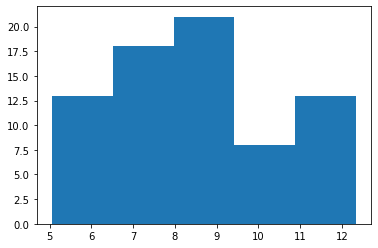

In [468]:
plt.hist(stores.CPB,bins=5)
plt.show()

In [469]:
stores['Store_Labels']=pd.DataFrame(pd.cut(stores['CPB'],5,labels=['low','midlow','med','medhigh','high']))
stores

,Store,CPB,Store_Labels
0,2190,11.331141,high
1,2248,12.339420,high
2,2527,8.356257,med
3,2528,8.137310,med
4,2532,8.094873,med
5,2561,9.834383,medhigh
6,2626,9.497015,medhigh
7,2627,8.173679,med
8,2633,11.269428,high
9,2636,8.996288,med


In [472]:
m12merge=m12merge.merge(stores, how='inner',left_on='Store Number',right_on='Store')

In [473]:
m12merge

,Store Number,Item Number,Volume Sold (Liters),State Bottle Cost,Cost Total,Item_Number_Labels,Store,CPB,Store_Labels
0,2532,65256,9.00,11.58,138.96,often,2532,8.094873,med
1,2532,65256,198.00,12.04,3178.56,often,2532,8.094873,med
2,2532,65256,9.00,12.04,144.48,often,2532,8.094873,med
3,2532,65256,9.00,12.04,144.48,often,2532,8.094873,med
4,2532,65256,9.00,12.04,144.48,often,2532,8.094873,med
...,...,...,...,...,...,...,...,...,...
183333,4680,12404,1.12,1.87,5.61,occasional,4680,5.814365,low
183334,4680,12404,0.75,1.87,3.74,occasional,4680,5.814365,low
183335,4680,12404,0.75,2.05,4.10,occasional,4680,5.814365,low
183336,4680,12404,0.75,2.05,4.10,occasional,4680,5.814365,low


In [474]:
m12merge=m12merge.drop(['Store','CPB'],axis=1)

In [476]:
m12merge.isna().sum()

Store Number            0
Item Number             0
Volume Sold (Liters)    0
State Bottle Cost       0
Cost Total              0
Item_Number_Labels      0
Store_Labels            0
dtype: int64

In [477]:
m12merge.dtypes

Store Number             object
Item Number              object
Volume Sold (Liters)    float64
State Bottle Cost       float64
Cost Total              float64
Item_Number_Labels       object
Store_Labels             object
dtype: object

In [483]:
m12merge['Volume Sold (Liters)'].max()

15000.0

In [491]:
m12merge['Volume Sold (Liters)'].sort_values().tail(30)

116669     1050.0
16708      1050.0
116673     1050.0
116670     1050.0
116675     1050.0
128245     1050.0
116674     1050.0
14879      1050.0
153281     1176.0
153222     1200.0
147100     1200.0
147126     1200.0
147082     1200.0
147130     1200.0
145058     1200.0
147133     1200.0
147115     1200.0
141970     1200.0
146234     1200.0
146246     1200.0
147118     1200.0
155247     1320.0
143342     1440.0
142763     1584.0
143336     1800.0
147114     1800.0
106257     2100.0
145068     3600.0
146113    15000.0
146115    15000.0
Name: Volume Sold (Liters), dtype: float64

In [488]:
f12[f12['Volume Sold (Liters)']==15000.0]

,Date,Store Number,Category Name,Vendor Number,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
103198,2012-12-03,2633,SPICED RUM,260.0,43337,Captain Morgan Spiced Rum,12,1000,11.3,16.94,15000,254100.0,15000.0
127275,2012-06-04,2633,SPICED RUM,260.0,43337,Captain Morgan Spiced Rum,12,1000,11.3,16.94,15000,254100.0,15000.0


In [492]:
f12['Volume Sold (Liters)'].describe()

count    184093.000000
mean         11.026828
std          61.085508
min           0.100000
25%           2.250000
50%           9.000000
75%          10.500000
max       15000.000000
Name: Volume Sold (Liters), dtype: float64

In [493]:
f12['Volume Sold (Liters)'].describe().T['75%']

10.5

In [494]:
iqr=f12['Volume Sold (Liters)'].describe().T['75%']-f12['Volume Sold (Liters)'].describe().T['25%']

In [507]:
ul=f12['Volume Sold (Liters)'].describe().T['75%']+4*iqr
ul

43.5

In [508]:
toohigh=f12[f12['Volume Sold (Liters)']>ul]
len(toohigh)

5730

In [505]:
len(f12['Volume Sold (Liters)'])

184093

In [509]:
5730/184093

0.031125572400906062

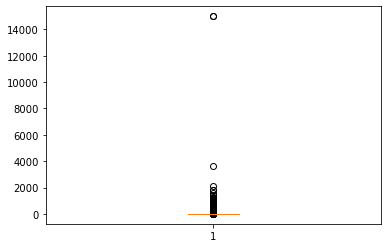

In [489]:
plt.boxplot(f12['Volume Sold (Liters)'])
plt.show()

ValueError: too many values to unpack (expected 2)

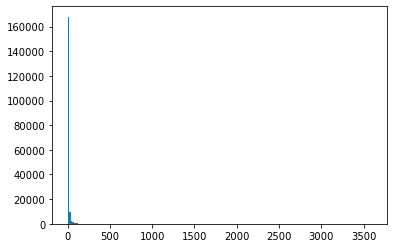

In [539]:
counts,values=plt.hist(m12merge['Volume Sold (Liters)'],bins=200)
plt.show()

In [512]:
logtry=list(map(lambda x: np.log(x),m12merge['Volume Sold (Liters)']))

ValueError: too many values to unpack (expected 2)

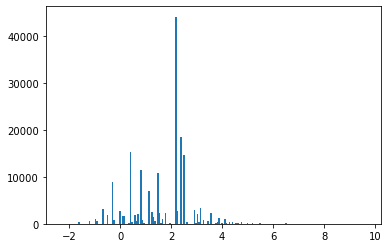

In [538]:
counts,values=plt.hist(logtry,bins=200)
plt.show()

In [518]:
logtry=pd.DataFrame(logtry)
logtry.columns=['column']

In [519]:
logtry.describe()

,column
count,183338.000000
mean,1.639269
std,1.168364
min,-2.302585
25%,0.810930
50%,2.197225
75%,2.351375
max,9.615805


In [522]:
iqr=logtry['column'].describe().T['75%']-logtry['column'].describe().T['25%']
iqr

1.5404450409471488

In [528]:
ul=logtry['column'].describe().T['75%']+4*iqr
ul

8.513155420952073

In [529]:
toohigh=logtry[logtry['column']>ul]
len(toohigh)

2

In [536]:
logtry.shape

(183338, 1)

In [541]:
m12merge

,Store Number,Item Number,Volume Sold (Liters),State Bottle Cost,Cost Total,Item_Number_Labels,Store_Labels,Log_Trans:Volume_Sold_(L)
0,2532,65256,9.00,11.58,138.96,often,med,2.197225
1,2532,65256,198.00,12.04,3178.56,often,med,5.288267
2,2532,65256,9.00,12.04,144.48,often,med,2.197225
3,2532,65256,9.00,12.04,144.48,often,med,2.197225
4,2532,65256,9.00,12.04,144.48,often,med,2.197225
...,...,...,...,...,...,...,...,...
183333,4680,12404,1.12,1.87,5.61,occasional,low,0.113329
183334,4680,12404,0.75,1.87,3.74,occasional,low,-0.287682
183335,4680,12404,0.75,2.05,4.10,occasional,low,-0.287682
183336,4680,12404,0.75,2.05,4.10,occasional,low,-0.287682


# This shows that a log transformation of the Volume data preserves more of the data

In [530]:
m12merge['Log_Trans:Volume_Sold_(L)']=logtry[['column']]

In [531]:
m12merge.columns

Index(['Store Number', 'Item Number', 'Volume Sold (Liters)',
       'State Bottle Cost', 'Cost Total', 'Item_Number_Labels', 'Store_Labels',
       'Log_Trans:Volume_Sold_(L)'],
      dtype='object')

In [532]:
m12merge.shape

(183338, 8)

In [533]:
m12merge=m12merge[m12merge['Volume Sold (Liters)']!=15000.0]

In [534]:
m12merge.shape

(183336, 8)

In [535]:
m12X=m12merge[['Item_Number_Labels','Store_Labels','Log_Trans:Volume_Sold_(L)']]
m12T=m12merge[['Cost Total']]
m12discrete=m12merge[['Item_Number_Labels','Store_Labels']]
m12continuous=m12merge[['Log_Trans:Volume_Sold_(L)']]

In [540]:
m12merge.to_csv('m12merge.csv')
m12X.to_csv('m12X.csv')
m12T.to_csv('m12T.csv')
m12discrete.to_csv('m12discrete.csv')
m12continuous.to_csv('m12continuous.csv')